In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/shahmdmesbahulislam/Documents/code/Data_Science_nd_ML/Machine Learning/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data exploration and visualization:

In [3]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [4]:
retained = df[df.left==0]
retained.shape

(11428, 10)

### Average number for all columns:

In [5]:
df.groupby('left').mean()

/var/folders/w3/vd31m_lx5f54537qkrrjg9dm0000gn/T/ipykernel_30323/588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions:
1. **Satisfaction Level** : Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones(0.66)
2. **Average Monthly Hours** : Average monthly hourse are higher in employees leaving the firm (199 vs 207)
3. **Promotion Last 5 Years** : Employees who are given promotion are likely to be retained at firm

### Impact of salary on employee retention:

<AxesSubplot:xlabel='salary'>

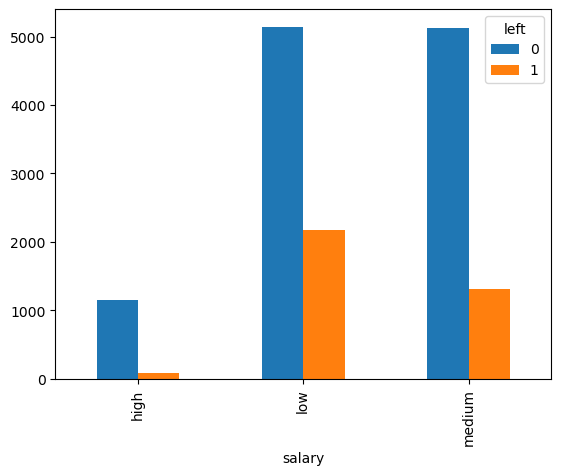

In [6]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

### Department wise employee retention rate:

<AxesSubplot:xlabel='Department'>

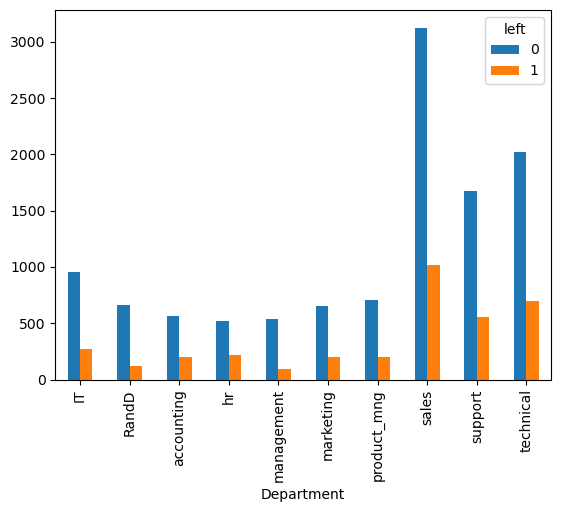

In [7]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

<AxesSubplot:xlabel='Work_accident'>

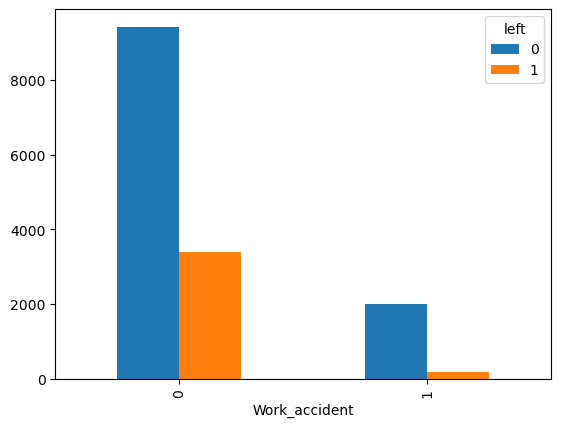

In [9]:
pd.crosstab(df.Work_accident,df.left).plot(kind='bar')

<AxesSubplot:xlabel='time_spend_company'>

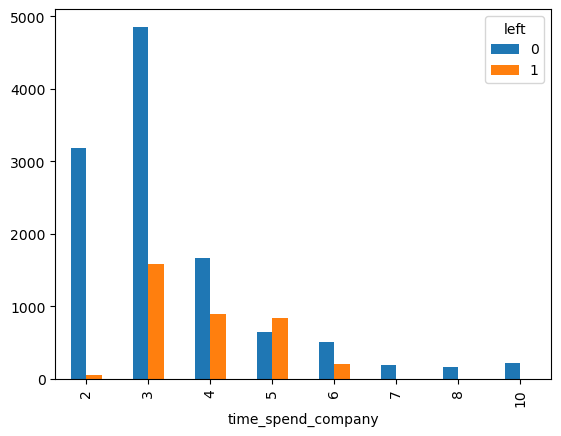

In [10]:
pd.crosstab(df.time_spend_company,df.left).plot(kind='bar')

In [11]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','time_spend_company']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,time_spend_company
0,0.38,157,0,low,3
1,0.80,262,0,medium,6
2,0.11,272,0,medium,4
3,0.72,223,0,low,5
4,0.37,159,0,low,3


In [12]:
salary_dummies = pd.get_dummies(subdf.salary,prefix='salary')

In [13]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [14]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,time_spend_company,salary_high,salary_low,salary_medium
0,0.38,157,0,low,3,0,1,0
1,0.80,262,0,medium,6,0,0,1
2,0.11,272,0,medium,4,0,0,1
3,0.72,223,0,low,5,0,1,0
4,0.37,159,0,low,3,0,1,0


In [15]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,salary_high,salary_low,salary_medium
0,0.38,157,0,3,0,1,0
1,0.80,262,0,6,0,0,1
2,0.11,272,0,4,0,0,1
3,0.72,223,0,5,0,1,0
4,0.37,159,0,3,0,1,0


In [16]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,salary_high,salary_low,salary_medium
0,0.38,157,0,3,0,1,0
1,0.80,262,0,6,0,0,1
2,0.11,272,0,4,0,0,1
3,0.72,223,0,5,0,1,0
4,0.37,159,0,3,0,1,0


In [17]:
y = df.left

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.3)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(X_train,y_train)

/Users/shahmdmesbahulislam/opt/anaconda3/envs/DS_ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [23]:
model.score(X_test,y_test)

0.7685714285714286